In [195]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import math


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
import matplotlib.pyplot as plt
import numpy as np

In [203]:
recife = pd.read_excel('/content/drive/My Drive/DIO/Recife.xlsx')
salvador = pd.read_excel('/content/drive/My Drive/DIO/Salvador.xlsx')
natal = pd.read_excel('/content/drive/My Drive/DIO/Natal.xlsx')
fortaleza = pd.read_excel('/content/drive/My Drive/DIO/Fortaleza.xlsx')
aracaju = pd.read_excel('/content/drive/My Drive/DIO/Aracaju.xlsx')

In [198]:
datasets = pd.concat([recife, salvador, natal, fortaleza, aracaju])

In [ ]:
datasets.isna().sum() 

## cidades x vendas

In [204]:
cidade_vendas = datasets.groupby(['Cidade'])['Vendas'].sum()

In [205]:
cidades_vendas_idx = cidade_vendas.index

In [206]:
sum_values = cidade_vendas.sum()

In [207]:
sizes = []
for cvi in cidades_vendas_idx:
  sizes.append(cidade_vendas[cvi]/sum_values)

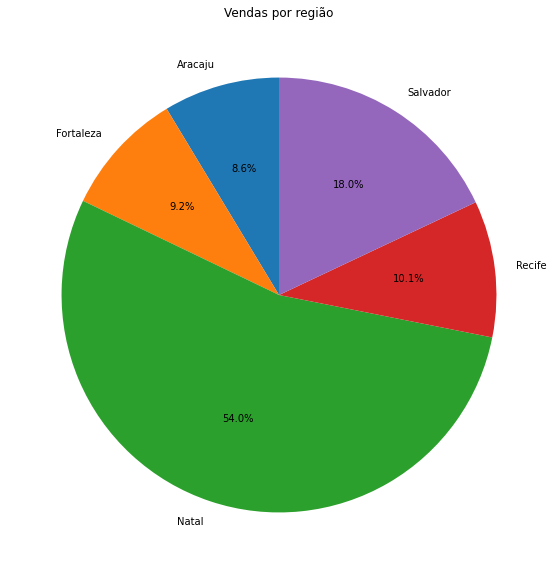

In [208]:
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Vendas por região")
ax1.pie(sizes, labels= cidades_vendas_idx, autopct = '%1.1f%%', startangle=90)
plt.show()

## loja x vendas

In [209]:
loja_vendas = datasets.groupby(['LojaID'])['Vendas'].sum()

In [210]:
loja_vendas.sort_values(ascending= False, inplace=True)
loja_vendas_idx = loja_vendas.index

In [ ]:
loja_vendas

In [213]:
x = ['LOJA '+str(a) for a in loja_vendas_idx] 

y = [a for a in loja_vendas]

Text(0.5, 0, 'LOJA')

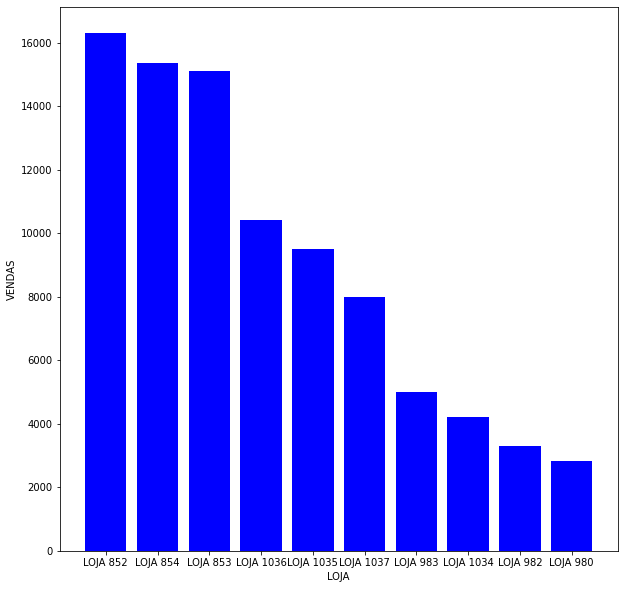

In [214]:
plt.figure(figsize= (10,10))
plt.bar(x[0:10], y[0:10], color = 'blue')
plt.ylabel("VENDAS")
plt.xlabel("LOJA")

## vendas geral meses 2019


In [215]:
import datetime

In [216]:
datas = datasets['Data']

In [ ]:
for x in datas:
  print(x.strftime("%m"))

In [219]:
ano = [x.strftime("%Y") for x in datas]
meses = [x.strftime("%m") for x in datas]
dias = [x.strftime("%d") for x in datas]

In [220]:

datasets["dia"], datasets["ano"], datasets["mes"] = dias, ano, meses

In [221]:
meses_vendas2019 = datasets[datasets['ano'] == '2019'].groupby(['mes'])['Vendas'].sum()

In [222]:
meses_vendas2019.sort_values(ascending= False, inplace = True)

In [223]:
meses_vendas2019idx = meses_vendas2019.index

In [224]:
meses_label = ['Mes ' +str(x) for x in meses_vendas2019idx]

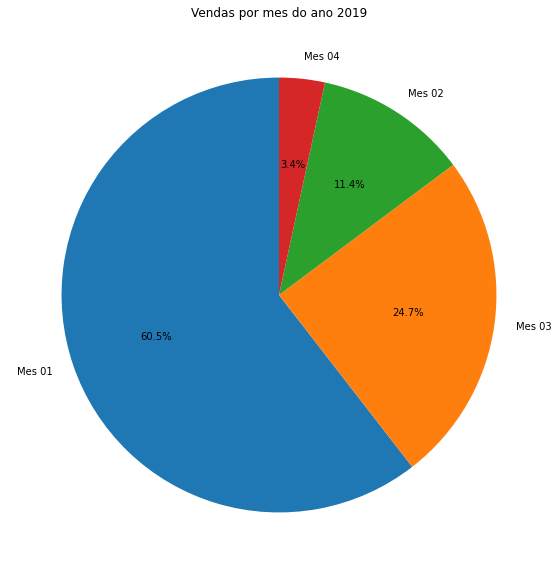

In [225]:
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Vendas por mes do ano 2019")
ax1.pie(meses_vendas2019, labels= meses_label, autopct = '%1.1f%%', startangle=90)
plt.show()

# vendas geral meses 2018

In [226]:
meses_vendas2018 = datasets[datasets['ano'] == '2018'].groupby(['mes'])['Vendas'].sum()
meses_vendas2018.sort_values(ascending= False, inplace = True)
meses_vendas2018idx = meses_vendas2018.index
meses_label = ['Mes ' +str(x) for x in meses_vendas2018idx]


In [ ]:
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Vendas por mes do ano 2019")
ax1.pie(meses_vendas2018, labels= meses_label, autopct = '%1.1f%%', startangle=30)
plt.show()

# vendas por região

para mudar o ano é só mudar o valor da variavel "ano"

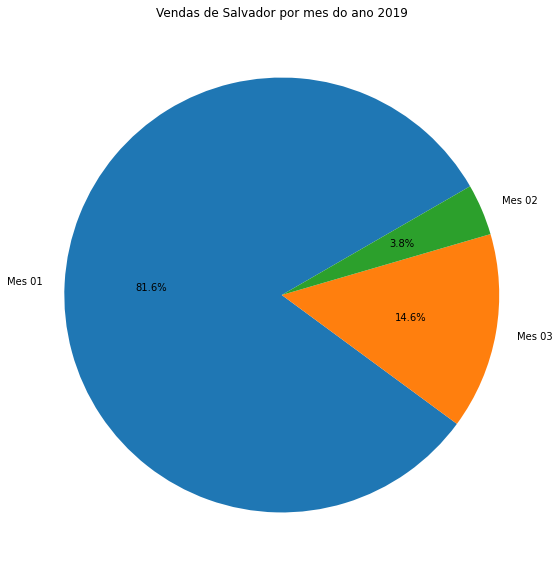

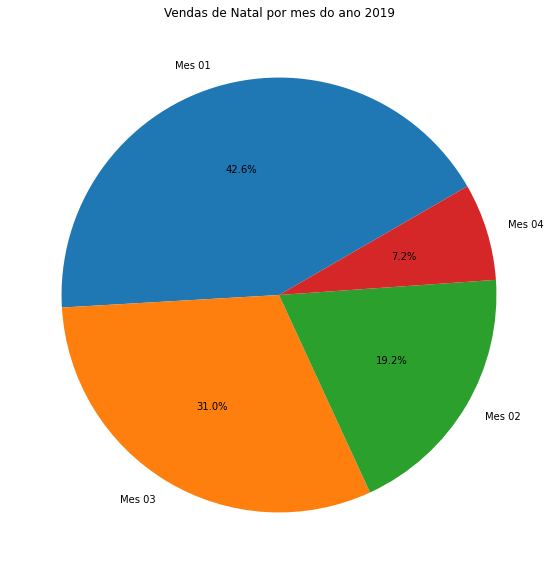

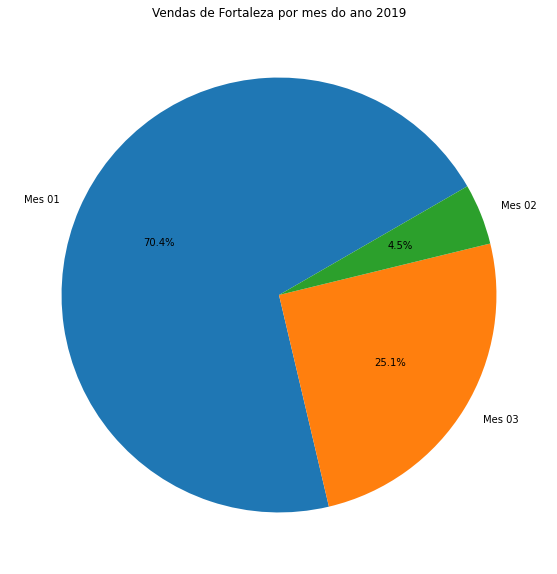

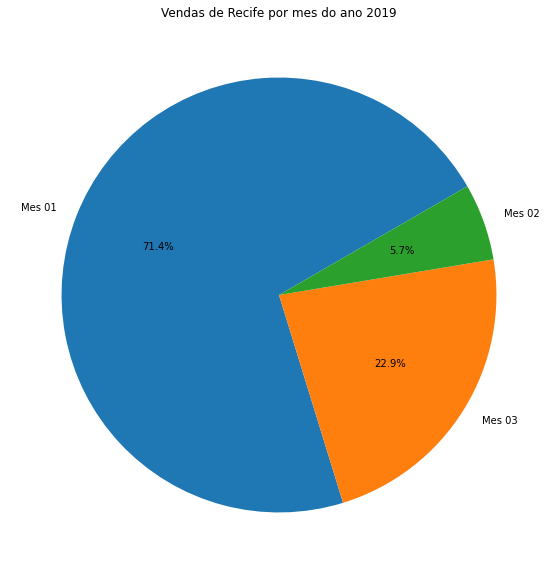

In [228]:
ano = '2019'
for cidade in ['Salvador', 'Natal', 'Fortaleza', 'Recife', 'Aracaju']:
  meses_vendas = datasets[((datasets['ano'] == ano) & (datasets['Cidade'] == cidade ))].groupby(['mes'])['Vendas'].sum()
  if meses_vendas.shape[0] > 1:
    meses_vendas.sort_values(ascending= False, inplace = True)
    meses_vendasidx = meses_vendas.index
    meses_label = ['Mes ' +str(x) for x in meses_vendasidx]
    fig, ax1 = plt.subplots(figsize = (10,10)) 
    ax1.set_title("Vendas de {} por mes do ano {}".format(cidade, ano))
    ax1.pie(meses_vendas, labels= meses_label, autopct = '%1.1f%%', startangle=30)
    plt.show()
# talvez por as regiões serem cidades turisticas, no começo do ano tende a ter mais vendas devido ao perido de ferias (sugestão)

In [229]:
ano = '2019'
for cidade in ['Salvador', 'Natal', 'Fortaleza', 'Recife', 'Aracaju']:
  loja_vendas = datasets[((datasets['ano'] == ano) & (datasets['Cidade'] == cidade ))].groupby(['LojaID'])['Vendas'].sum()
  if meses_vendas.shape[0] > 1:
    loja_vendas.sort_values(ascending= False, inplace = True)
    loja_vendasidx = loja_vendas.index
    loja_vendas_label = ['Loja ' +str(x) for x in loja_vendasidx]
    fig, ax1 = plt.subplots(figsize = (10,10)) 
    ax1.set_title("Vendas de {} por Lojas do ano {}".format(cidade, ano))
    ax1.pie(loja_vendas, labels= loja_vendas_label, autopct = '%1.1f%%', startangle=30)
    plt.show()

##adventure works

In [104]:
adv = pd.read_excel('/content/drive/My Drive/DIO/AdventureWorks.xlsx')

In [ ]:
adv.isna().sum()

In [ ]:
adv.Fabricante.value_counts()

In [ ]:
adv

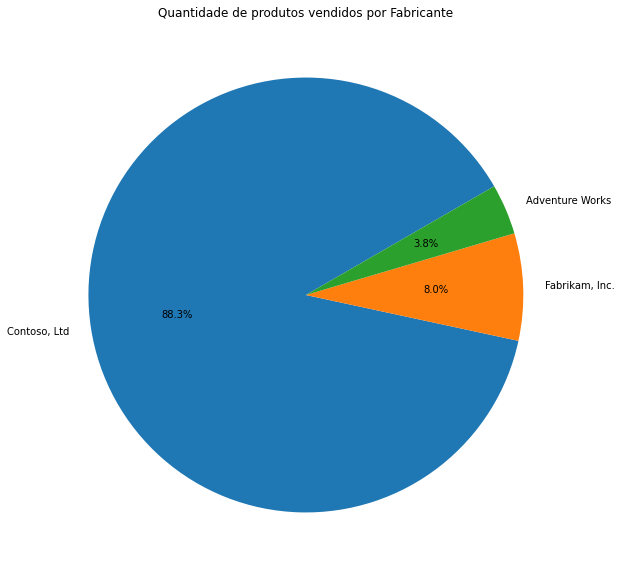

In [185]:
fab_qtd = adv.groupby(['Fabricante'])['Quantidade'].sum()
fab_qtd.sort_values(ascending= False, inplace = True)
fab_qtdidx = fab_qtd.index
fab_qtdLabel = [str(x) for x in fab_qtdidx]
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Quantidade de produtos vendidos por Fabricante".format(cidade, ano))
ax1.pie(fab_qtd, labels=fab_qtdLabel, autopct = '%1.1f%%', startangle=30)
plt.show()

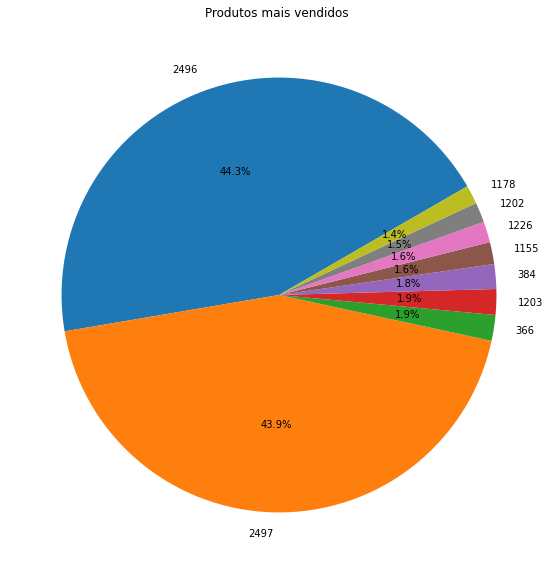

In [186]:
fab_qtd = adv.groupby(['ID Produto'])['Quantidade'].sum()
fab_qtd.sort_values(ascending= False, inplace = True)
fab_qtdidx = fab_qtd.index
fab_qtdLabel = [str(x) for x in fab_qtdidx]
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Produtos mais vendidos ".format(cidade, ano))
ax1.pie(fab_qtd, labels=fab_qtdLabel, autopct = '%1.1f%%', startangle=30)
plt.show()

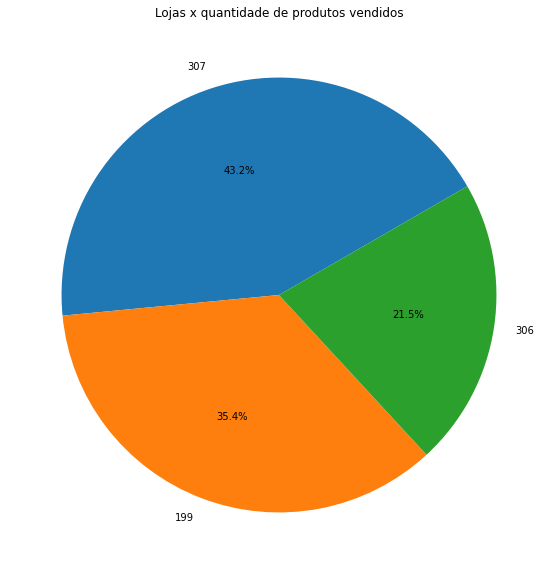

In [187]:
fab_qtd = adv.groupby(['ID Loja'])['Quantidade'].sum()
fab_qtd.sort_values(ascending= False, inplace = True)
fab_qtdidx = fab_qtd.index
fab_qtdLabel = [str(x) for x in fab_qtdidx]
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Lojas vs. quantidade de produtos vendidos".format(cidade, ano))
ax1.pie(fab_qtd, labels=fab_qtdLabel, autopct = '%1.1f%%', startangle=30)
plt.show()

In [130]:
adv['Lucro Unitario'] = adv['Preço Unitário'] - adv['Custo Unitário']

In [132]:
adv['Lucro Venda'] = adv['Lucro Unitario'] * adv['Quantidade']

In [134]:
adv['Dias Envio'] = adv['Data Envio'] - adv['Data Venda']

In [ ]:
adv

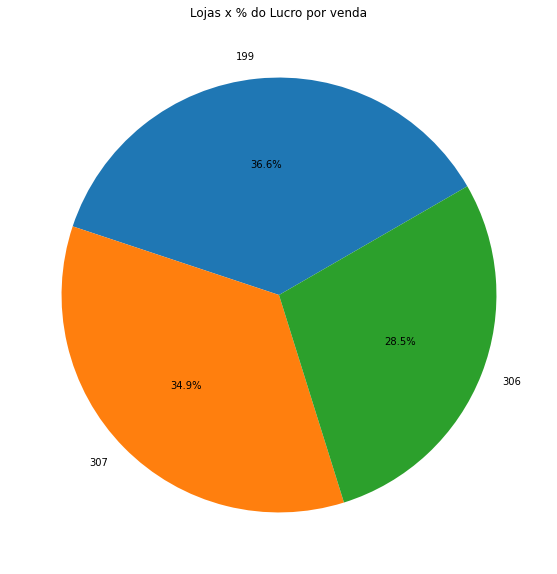

In [138]:
fab_qtd = adv.groupby(['ID Loja'])['Lucro Venda'].sum()
fab_qtd.sort_values(ascending= False, inplace = True)
fab_qtdidx = fab_qtd.index
fab_qtdLabel = [str(x) for x in fab_qtdidx]
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Lojas vs. % do Lucro por venda".format(cidade, ano))
ax1.pie(fab_qtd, labels=fab_qtdLabel, autopct = '%1.1f%%', startangle=30)
plt.show()

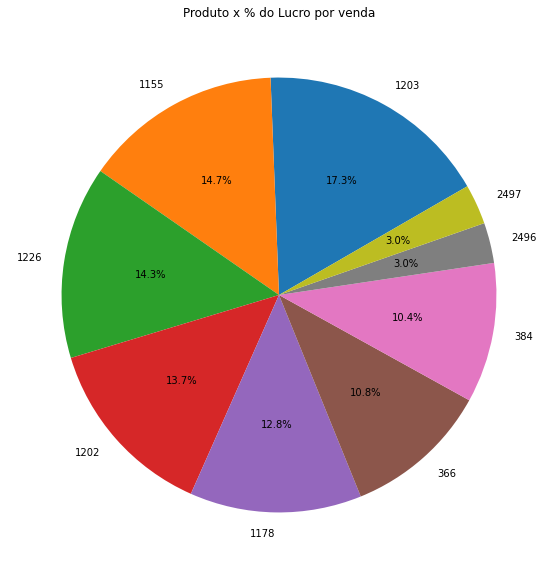

In [188]:
fab_qtd = adv.groupby(['ID Produto'])['Lucro Venda'].sum()
fab_qtd.sort_values(ascending= False, inplace = True)
fab_qtdidx = fab_qtd.index
fab_qtdLabel = [str(x) for x in fab_qtdidx]
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.set_title("Produto x % do Lucro por venda".format(cidade, ano))
ax1.pie(fab_qtd, labels=fab_qtdLabel, autopct = '%1.1f%%', startangle=30)
plt.show()

Datas

In [140]:
datas = adv['Data Venda']
ano = [x.strftime("%Y") for x in datas]
meses = [x.strftime("%m") for x in datas]
dias = [x.strftime("%d") for x in datas]

In [141]:
adv['dia'], adv['mes'], adv['ano'] = dias, meses, ano

In [ ]:
adv.ano.value_counts()

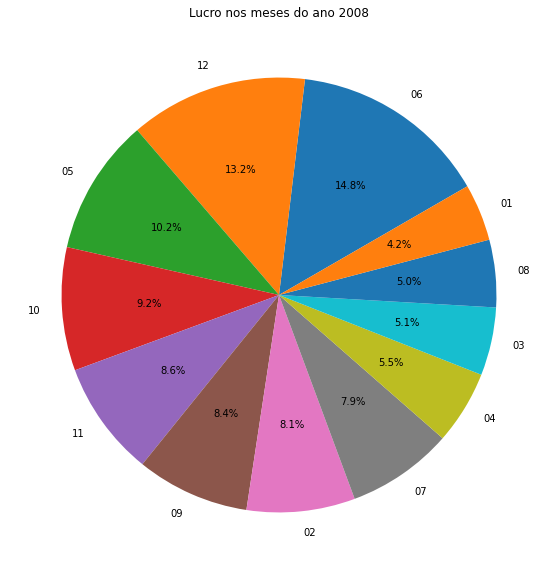

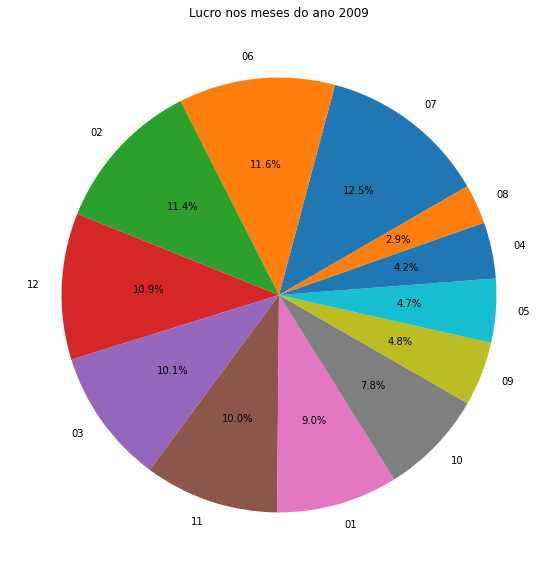

In [189]:
for ano in ['2008', '2009']:
  fab_qtd = adv[adv['ano'] == ano].groupby(['mes'])['Lucro Venda'].sum()
  fab_qtd.sort_values(ascending= False, inplace = True)
  fab_qtdidx = fab_qtd.index
  fab_qtdLabel = [str(x) for x in fab_qtdidx]
  fig, ax1 = plt.subplots(figsize = (10,10)) 
  explodes = [0.1 for x in range(len(fab_qtdLabel))]
  ax1.set_title("Lucro nos meses do ano {}".format(ano))
  ax1.pie(fab_qtd, labels=fab_qtdLabel, autopct = '%1.1f%%', startangle=30)
  plt.show()

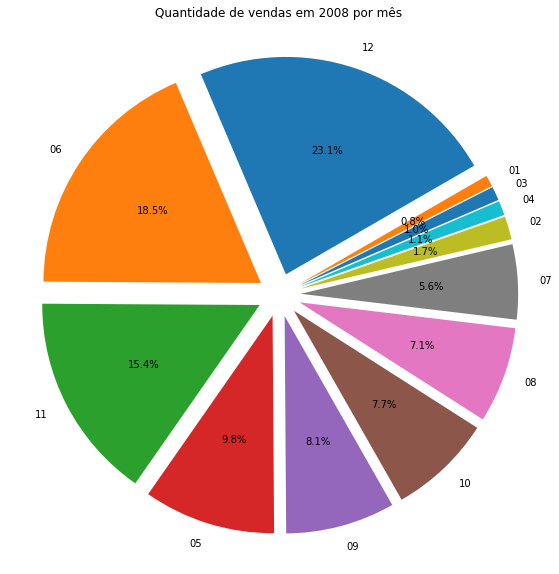

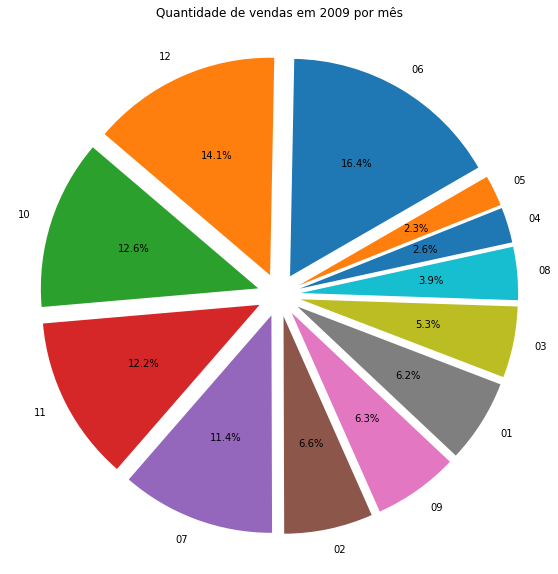

In [190]:

for ano in ['2008', '2009']:
  fab_qtd = adv[adv['ano'] == ano].groupby(['mes'])['Quantidade'].sum()
  fab_qtd.sort_values(ascending= False, inplace = True)
  fab_qtdidx = fab_qtd.index
  fab_qtdLabel = [str(x) for x in fab_qtdidx]
  fig, ax1 = plt.subplots(figsize = (10,10)) 
  explodes = [0.1 for x in range(len(fab_qtdLabel))]
  ax1.set_title("Quantidade de vendas em {} por mês".format(ano))
  ax1.pie(fab_qtd, labels=fab_qtdLabel, explode = explodes, autopct = '%1.1f%%', startangle=30)
  plt.show()

In [231]:
dias_envio = adv['Dias Envio'].value_counts()

In [232]:
dias_envioidx = dias_envio.index
dias_envioidx = [d.days for d in dias_envioidx]


Text(0.5, 1.0, 'Dias até o envio')

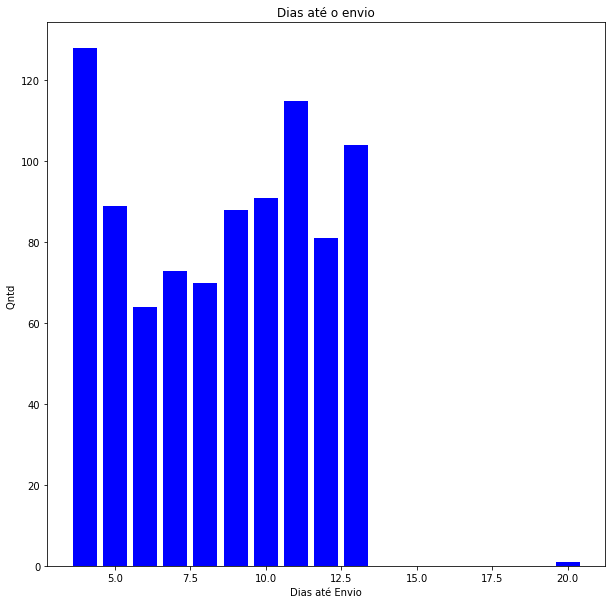

In [233]:
plt.figure(figsize= (10,10))
plt.bar(dias_envioidx, dias_envio, color = 'blue')
plt.ylabel("Qntd ")
plt.xlabel("Dias até Envio")
plt.title("Dias até o envio")